In [1]:
import tensorflow as tf
import tflearn
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Franky\AppData\Local\Continuum\anaconda3\envs\Python3.6\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


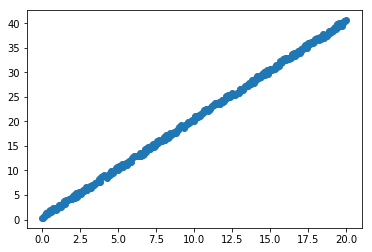

In [2]:
# Create Dataset
FEATURES = np.linspace(0, 20, 300, dtype=np.float64)[:, np.newaxis]
NOISE = np.random.sample((300, 1))
LABELS = FEATURES * 2 + NOISE
BATCH_SIZE = 10

# Plot Graph
plt.scatter(FEATURES, LABELS)
plt.show()

In [3]:
# Iterator
DATASET = tf.data.Dataset.from_tensor_slices((FEATURES, LABELS)).repeat().batch(BATCH_SIZE)
ITERATOR = DATASET.make_one_shot_iterator()
X, Y = ITERATOR.get_next()

In [4]:
# Neural Network
PREDICTION = tf.layers.dense(X, 1)
LOSS = tf.reduce_mean(tf.square(PREDICTION - Y))
OPTIMIZER = tf.train.GradientDescentOptimizer(0.01).minimize(LOSS)

In [5]:
# Run Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for _ in range(8):
    sess.run(OPTIMIZER)
    print('Loss:', sess.run(LOSS))

Loss: 15.190090448982208
Loss: 61.36126815459771
Loss: 94.974663959769
Loss: 66.55175672850467
Loss: 12.729488661652805
Loss: 0.06793225957841947
Loss: 0.14635967652166346
Loss: 0.042508491129581244
